## `np.digitize()`

In [8]:
import numpy as np

In [9]:
rands = np.random.rand(20)
rands

array([0.23756752, 0.3496109 , 0.57659196, 0.1687269 , 0.08196488,
       0.79084271, 0.95468773, 0.49252782, 0.61216064, 0.26527687,
       0.29509178, 0.5114945 , 0.38381201, 0.4895047 , 0.60625166,
       0.36506762, 0.76391885, 0.6872961 , 0.64457986, 0.67710792])

In [10]:
hist = np.histogram(rands)

In [11]:
np.digitize(rands, hist[1])

array([ 2,  4,  6,  1,  1,  9, 11,  5,  7,  3,  3,  5,  4,  5,  7,  4,  8,
        7,  7,  7])

## Feature Selection

In [15]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel

## Partial Correlation

Suppose we have a multiple linear regression of $y$ on $x_1$, $x_2$, $x_3$, and $x_4$. [This page](https://www.real-statistics.com/time-series-analysis/stochastic-processes/partial-autocorrelation-function/) tells us that the partial correlation between $y$ and $x_1$ can be calculated as "the correlation between the residuals of the regression of $y$ on $x_2$, $x_3$, and $x_4$ with the residuals of $x_1$ on $x_2$, $x_3$, and $x_4$". Let's see if we can verify this.

In [18]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from scipy import stats

In [2]:
X, y = make_regression(n_features=4, random_state=42)

In [3]:
x1 = X[:, 0]
x_rest = X[:, 1:]
lr = LinearRegression().fit(x_rest, y)

In [4]:
y_resids = lr.predict(x_rest) - y

In [5]:
lrx = LinearRegression().fit(x_rest, x1)

In [6]:
x_resids = lrx.predict(x_rest) - x1

In [9]:
np.corrcoef(y, x1)[0, 1]

0.02459928220307856

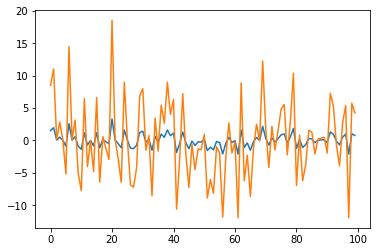

In [10]:
fig, ax = plt.subplots()
xx = np.arange(100)
ax.plot(xx, x_resids)
ax.plot(xx, y_resids);

In [11]:
np.corrcoef(y_resids, x_resids)[0, 1]

1.0

In [12]:
np.cov(y, lrx.predict(x_rest))[0, 1] /\
np.sqrt(np.var(lr.predict(x_rest))*np.var(lrx.predict(x_rest)))

-0.7055812322337391

### Second Example

In [13]:
X = np.array([2, 4, 15, 20])
Y = np.array([1, 2, 3, 4])
Z = np.array([0, 0, 1, 1]).reshape(-1, 1)

In [14]:
lr = LinearRegression().fit(Z, X)

In [15]:
lr2 = LinearRegression().fit(Z, Y)

In [16]:
XResids = lr.predict(Z) - X
YResids = lr2.predict(Z) - Y

In [17]:
np.corrcoef(XResids, YResids)[0, 1]

0.9191450300180579

### Third Example

In [19]:
dist = stats.norm()

fake_time = dist.rvs(100)

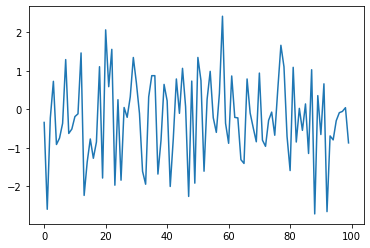

In [23]:
fig, ax = plt.subplots()

x_ax = np.arange(100)
ax.plot(x_ax, fake_time);

In [53]:
pacf(fake_time, nlags=4, method='ols-adjusted')

array([ 1.        , -0.14575655, -0.08296807, -0.19901497,  0.06643786])

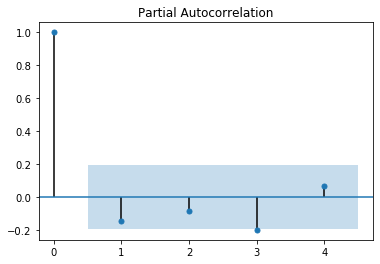

In [60]:
plot_pacf(fake_time, method='ols-adjusted', lags=4);

In [37]:
series = pd.Series(fake_time)

In [44]:
Z = np.hstack([series.shift(j).values.reshape(-1, 1) for j in range(2, 5)])

In [46]:
lry = LinearRegression().fit(Z[4:, :], series[4:])

In [47]:
lrx = LinearRegression().fit(Z[4:, :], series.shift()[4:])

In [48]:
y_resids = lry.predict(Z[4:, :]) - series[4:]
x_resids = lrx.predict(Z[4:, :]) - series.shift()[4:]

In [50]:
np.corrcoef(y_resids, x_resids)[0, 1]

-0.16554485905392927

### Fourth Example

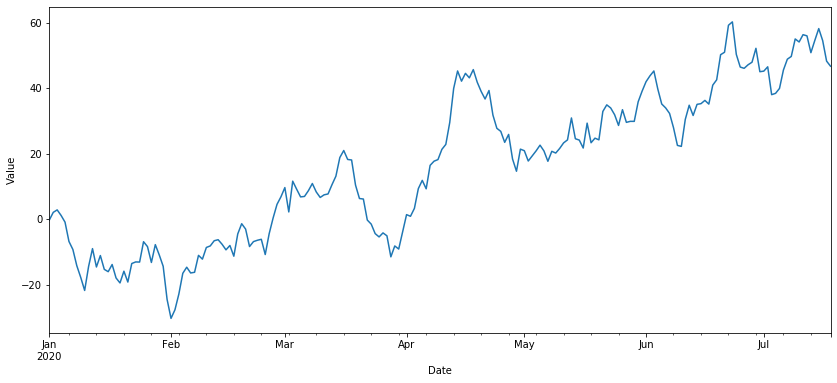

In [30]:
avg = 0
std = 4
n_pts = 200

# Dates & white noise (epsilon)
date_vals = pd.date_range(start='1/1/2020', periods=n_pts)
epsilon = np.random.normal(avg, std, n_pts)

# Generate data starting at y0 & "walk" based on epsilon (white noise model)
y0 = 0
vals = y0 + np.cumsum(epsilon) 
time_series = pd.Series(vals, index=date_vals)

# Plot out the model
ax = time_series.plot(figsize=(14, 6))
ax.set_ylabel("Value")
ax.set_xlabel("Date")
plt.show()

In [33]:
pacf(time_series, nlags=10)

array([ 1.        ,  0.98401318, -0.08565679, -0.10621459, -0.07232637,
        0.01019665, -0.00654946, -0.03380922,  0.14000464, -0.11083363,
       -0.17855616])

## Covariance = Correlation

In [69]:
data = np.array([(2, 6), (2, 6), (4, 8), (4, 8), (3, 7)])

In [70]:
np.corrcoef(data[:, 0], data[:, 1])

array([[1., 1.],
       [1., 1.]])

In [71]:
np.cov(data[:, 0], data[:, 1])

array([[1., 1.],
       [1., 1.]])

## Mechanics

In [377]:
def position(t, x_0=0, v_0=0, a=-9.8):
    return x_0 + v_0 * t + 0.5 * a * t**2

In [379]:
position(1, x_0=100)

95.1

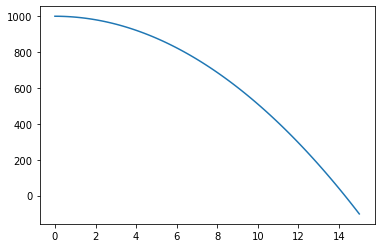

In [387]:
t = np.linspace(0, 15, 100)

plt.plot(t, position(t, x_0=1000));

## `pd.cut()`

In [9]:
df = pd.DataFrame(np.random.rand(10, 1), columns=['test'])
df

,test
0,0.956246
1,0.186059
2,0.416506
3,0.734815
4,0.848489
5,0.446202
6,0.892041
7,0.625035
8,0.446300
9,0.054496


In [10]:
pd.cut(df['test'], bins=3, labels=['low', 'medium', 'big'])

0       big
1       low
2    medium
3       big
4       big
5    medium
6       big
7    medium
8    medium
9       low
Name: test, dtype: category
Categories (3, object): ['low' < 'medium' < 'big']

In [11]:
data = [0, 0.4, 0.2, 2, 4, 4.1, 3.9]

In [18]:
pd.cut(pd.DataFrame(data)[0], bins=3)

0    (-0.0041, 1.367]
1    (-0.0041, 1.367]
2    (-0.0041, 1.367]
3      (1.367, 2.733]
4        (2.733, 4.1]
5        (2.733, 4.1]
6        (2.733, 4.1]
Name: 0, dtype: category
Categories (3, interval[float64]): [(-0.0041, 1.367] < (1.367, 2.733] < (2.733, 4.1]]

In [24]:
print(4.1 / 3, 4.1 / (3/2))

1.3666666666666665 2.733333333333333


In [27]:
print(np.percentile(a=data, q=33), np.percentile(a=data, q=67))

0.396 3.902


## Matrix Multiplication

$\begin{equation}
\begin{bmatrix}
a_{11} & ... & a_{1n} \\
. & . &  . \\
. &  . & . \\
. & . & . \\
a_{m1} & ... & a_{mn}
\end{bmatrix}
\begin{bmatrix}
b_{11} & ... & b_{1p} \\
. & . & . \\
. & . & . \\
. & . & . \\
b_{n1} & ... & b_{np}\end{bmatrix}
=
\begin{bmatrix}
\vec{a_{1j}}\cdot\vec{b_{k1}} & ... & \vec{a_{1j}}\cdot\vec{b_{kp}} \\
. & . & . \\
. & . & . \\
. & . & . \\
\vec{a_{mj}}\cdot\vec{b_{k1}} & ... & \vec{a_{mj}}\cdot\vec{b_{kp}}
\end{bmatrix}
\end{equation}$

$\hat{y} = X\vec{\beta}$

## `scipy.stats.norm.fit()`

In [28]:
from scipy import stats

In [35]:
stats.norm.fit(8)

(8.0, 0.0)

In [31]:
stats.norm.fit((8, 4))

(6.0, 2.0)

In [37]:
stats.norm.fit((8, 4, 9, 0, 9))

(6.0, 3.521363372331802)

In [38]:
data = (8, 4, 9, 0, 9)
np.std(data)

3.521363372331802

## More Tools in `sklearn.model_selection`

In [62]:
from sklearn.model_selection import LeaveOneOut, ShuffleSplit, GroupKFold, cross_val_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [48]:
X, y = make_classification()

In [49]:
LeaveOneOut().get_n_splits(X)

100

In [55]:
logreg = LogisticRegression()

In [56]:
cross_val_score(logreg, X, y)

array([0.85, 0.85, 0.95, 1.  , 0.85])

In [57]:
loo = LeaveOneOut()
cross_val_score(logreg, X, y, cv=loo)

array([1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [59]:
ss = ShuffleSplit(train_size=0.5, test_size=0.3)
cross_val_score(logreg, X, y, cv=ss)

array([0.9       , 0.86666667, 0.9       , 0.96666667, 0.83333333,
       0.8       , 0.96666667, 0.9       , 0.9       , 0.86666667])

In [77]:
gkf = GroupKFold()
cross_val_score(logreg, X, y, cv=gkf, groups=np.round([j/10 for j in range(1, 101)]))

array([0.95      , 0.85      , 0.8       , 0.95454545, 0.83333333])

## Heatmap of `GridSearchCV().cv_results_`

## F-Statistic

$\large F=\frac{\sum^K_{i=1}n_i(\bar{Y}_i-\bar{Y})^2}{\sum^K_{i=1}\sum^{n_i}_{j=1}(Y_{ij}-\bar{Y}_i)^2}\frac{N-K}{K-1}$

## New Time Series Lecture Dataset

In [84]:
sales = pd.read_csv('/Users/gdamico/Downloads/Historical_Data.csv')
sales.sample(20)

,Date,Article_ID,Country_Code,Sold_Units
3981,20181002,3446,SE,1
3281,20170601,332,SE,1
335,20170815,3417,AT,1
4538,20181019,4139,SE,4
2158,20181208,362,FR,2
3424,20181025,332,SE,3
659,20180331,3576,AT,1
2662,20181102,1516,FR,1
2172,20181222,362,FR,1
2638,20180930,1516,FR,13


## Triangles

In [106]:
def draw_triangles(n_tri=1):
    import numpy as np
    from matplotlib import pyplot as plt
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Set starting points
    a = 3
    b = 4
    
    # Draw first triangle
    ax.plot([0, a], [0, 0])
    ax.plot([a, a], [0, b])
    ax.plot([0, a], [0, b])
    
    last = [a, b]
    out = [a, b, int(np.sqrt(last[0]**2+last[1]**2))]
    
    # Draw the rest
    for _ in range(n_tri-1):
        next_leg = (last[0]**2+last[1]**2) // 2
        theta = np.arctan(-last[0] / last[1])
        next_x = last[0] + next_leg * np.cos(theta)
        next_y = last[1] + next_leg * np.sin(theta)
        
        ax.plot([last[0], next_x], [last[1], next_y])
        ax.plot([0, next_x], [0, next_y])
        max_ = np.max([next_x, next_y])
        
        last = [next_x, next_y]
        out.extend([int(next_leg), int(np.sqrt(out[-1]**2+next_leg**2))])
        
    return out

[3, 4, 5]

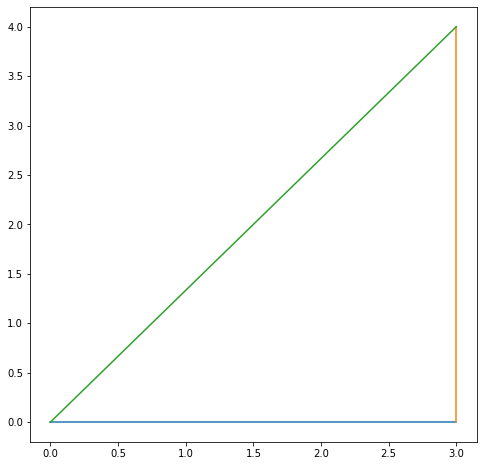

In [107]:
draw_triangles()

[3, 4, 5, 12, 13]

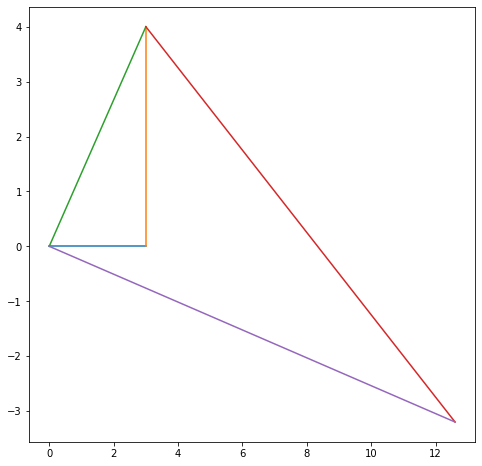

In [108]:
draw_triangles(2)

[3, 4, 5, 12, 13, 84, 85]

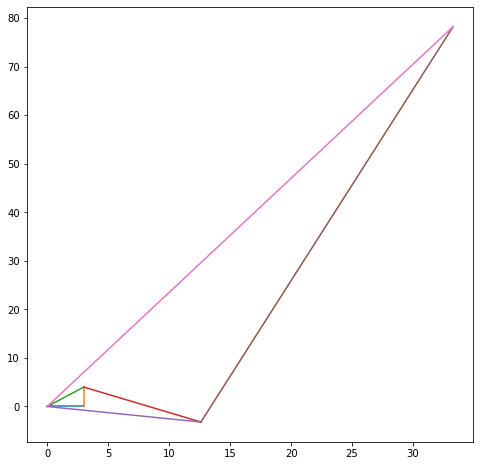

In [109]:
draw_triangles(3)

[3, 4, 5, 12, 13, 84, 85, 3612, 3613]

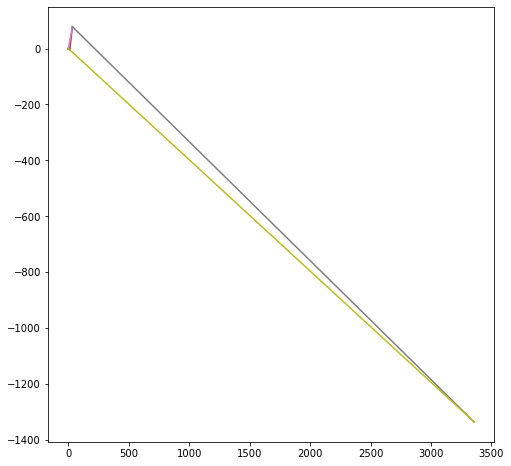

In [110]:
draw_triangles(4)

## $A^{-1} = \frac{C^T}{|A|}$ where C Is Cofactor Matrix

In [130]:
np.random.seed(42)
A = np.random.rand(3, 3)

In [131]:
det_A = np.linalg.det(A)

In [132]:
A

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501]])

In [135]:
cofactors = np.zeros((3, 3))

In [153]:
cofactors[0, 0] = np.linalg.det(A[1:, 1:])
cofactors[0, 1] = -np.linalg.det(np.hstack((A[1:, 0], A[1:, 2])).reshape(2, 2).T)
cofactors[0, 2] = np.linalg.det(A[:2, :2])
cofactors[1, 0] = -np.linalg.det(np.vstack((A[0, 1:], A[2, 1:])).reshape(2, 2))
cofactors[1, 1] = np.linalg.det(np.array([A[0, 0], A[0, 2], A[2, 0], A[2, 2]]).reshape(2, 2))
cofactors[1, 2] = -np.linalg.det(np.vstack((A[0, :2], A[2, :2])).reshape(2, 2))
cofactors[2, 0] = np.linalg.det(A[:2, 1:])
cofactors[2, 1] = -np.linalg.det(np.hstack((A[:2, 0], A[:2, 2])).reshape(2, 2).T)
cofactors[2, 2] = np.linalg.det(A[:2, :2])

In [154]:
cofactors

array([[-0.04133359, -0.35080188, -0.51071795],
       [ 0.06254705,  0.18262484, -0.2691968 ],
       [ 0.03410152,  0.37978818, -0.51071795]])

In [157]:
cofactors.T / det_A

array([[ -1.72626243,   2.61222492,   1.42422141],
       [-14.65094529,   7.62717264,  15.86153376],
       [-21.32970539, -11.24277772, -21.32970539]])

In [158]:
np.linalg.inv(A)

array([[ -1.72626243,   2.61222492,   1.42422141],
       [-14.65094529,   7.62717264,  15.86153376],
       [ 21.2780693 , -11.24277772, -21.32970539]])

## Canvas API

In [247]:
import requests as rq

In [249]:
rq.get('https://learning.flatironschool.com',
       params={'client_id': 'greg.damico@flatironschool.com'})

<Response [401]>

In [255]:
rq.get('https://learning.flatironschool.com/login/oauth/auth',
       params={'client_id': 'greg.damico@flatironschool.com',
              'response_type': 'code', 'redirect_uri': 'http://example.com'}).content

b'<!DOCTYPE html>\n<html class="scripts-not-loaded" dir="ltr"   lang="en">\n<head>\n  <meta charset="utf-8">\n  <link rel="preload" href="https://du11hjcvx0uqb.cloudfront.net/dist/fonts/lato/extended/Lato-Regular-bd03a2cc27.woff2" as="font" type="font/woff2" crossorigin="anonmyous">\n  <link rel="preload" href="https://du11hjcvx0uqb.cloudfront.net/dist/fonts/lato/extended/Lato-Bold-cccb897485.woff2" as="font" type="font/woff2" crossorigin="anonmyous">\n  <link rel="preload" href="https://du11hjcvx0uqb.cloudfront.net/dist/fonts/lato/extended/Lato-Italic-4eb103b4d1.woff2" as="font" type="font/woff2" crossorigin="anonmyous">\n  <link rel="stylesheet" media="screen" href="https://du11hjcvx0uqb.cloudfront.net/dist/brandable_css/no_variables/bundles/fonts-43e9c545fc.css" />\n    <script>if (navigator.userAgent.match(/(MSIE|Trident\\/)/)) location.replace(\'/ie-is-not-supported.html\')</script>\n  \n  <link rel="shortcut icon" type="image/x-icon" href="https://instructure-uploads.s3.amazonaws

## Type I and II Errors

In [274]:
from scipy import stats
import seaborn as sns
from matplotlib import pyplot

In [297]:
pop1 = stats.t(loc=100, scale=20, df=2).rvs(size=100)
pop2 = stats.t(loc=200, scale=20, df=2).rvs(size=100)

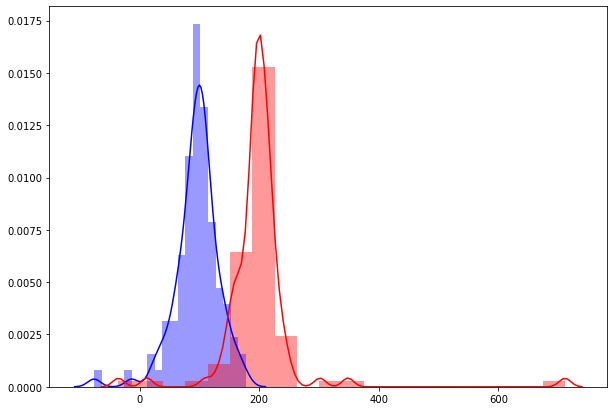

In [298]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(pop1, bins=20, color='b', ax=ax)
sns.distplot(pop2, bins=20, color='r', ax=ax);

## Grab Rankings from https://www.atptour.com/en/players/stan-wawrinka/w367/rankings-history

In [299]:
import requests as rq
from bs4 import BeautifulSoup

In [301]:
page = rq.get(url='https://www.atptour.com/en/players/stan-wawrinka/w367/rankings-history')

In [303]:
soup = BeautifulSoup(markup=page.text)

In [312]:
tables = soup.find_all('table', attrs={'class': 'mega-table'})
len(tables)

1

In [339]:
rankings = []
for row in tables[0].find('tbody').find_all('tr'):
    data = row.find_all('td')
    week = {'date': data[0].text.strip(),
            'singles': data[1].text.strip(),
            'doubles': data[2].text.strip()}
    rankings.append(week)

In [376]:
df = pd.DataFrame(rankings)
df['date'] = df['date'].map(pd.to_datetime)
df = df.set_index('date', drop=True)
df['singles'] = df['singles'].str.replace('T', '').map(int)
df['doubles'] = df['doubles'].str.replace('T', '').map(int)

In [378]:
df2 = df.sort_values('date')

In [379]:
df2.dtypes

singles    int64
doubles    int64
dtype: object

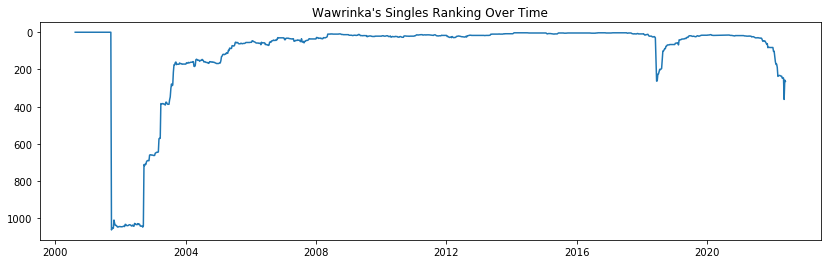

In [386]:
fig, ax = plt.subplots(figsize=(14, 4))

ax.xaxis_date()
ax.plot(df2.index, df2['singles'])
ax.invert_yaxis()
ax.set_title('Wawrinka\'s Singles Ranking Over Time');

## Jim Self-Lookup

In [6]:
import sys, os

In [9]:
sys.path.append(os.pardir)

In [22]:
from JimFiles.definiens1 import self_lookup_counter

In [20]:
line = PyDictionary().meaning('time').values()

In [23]:
self_lookup_counter('time')

Looking up 'time'


({'a',
  'accomplish',
  'action',
  'activity',
  'adjust',
  'along',
  'an',
  'and',
  'applied',
  'assign',
  'at',
  'attribute',
  'by',
  'certain',
  'clock',
  'considered',
  'continuum',
  'control',
  'coordinate',
  'desired',
  'dimension',
  'division',
  'duration',
  'equal',
  'event',
  'execution',
  'experience',
  'for',
  'force',
  'fourth',
  'from',
  'future',
  'given',
  'imprisoned',
  'in',
  'indefinite',
  'instance',
  'into',
  'is',
  'marked',
  'measure',
  'moment',
  'occasion',
  'occurs',
  'of',
  'on',
  'or',
  'part',
  'particular',
  'pas',
  'past',
  'performs',
  'period',
  'person',
  'point',
  'present',
  'prisoner',
  'reading',
  'regulate',
  'required',
  'resource',
  'rhythm',
  'set',
  'single',
  'so',
  'some',
  'something',
  'spatial',
  'specific',
  'speed',
  'sufficient',
  'suitable',
  'that',
  'the',
  'three',
  'through',
  'time',
  'to',
  'under',
  'usually',
  'which',
  'who',
  'with',
  'your'},
 1

In [4]:
self_lookup_counter('leaf')

Looking up 'leaf'


({'a',
  'and',
  'any',
  'book',
  'detachable',
  'door',
  'especially',
  'flat',
  'higher',
  'hinged',
  'in',
  'leaf',
  'look',
  'main',
  'manuscript',
  'material',
  'of',
  'or',
  'organ',
  'other',
  'over',
  'page',
  'photosynthesis',
  'plant',
  'printed',
  'produce',
  'section',
  'sheet',
  'table',
  'the',
  'through',
  'transpiration',
  'turn',
  'written'},
 1)

In [31]:
self_lookup_counter('mud')

Looking up 'mud'


({'charge',
  'earth',
  'mire',
  'muck',
  'mud',
  'or',
  'plaster',
  'remark',
  'slanderous',
  'soaked',
  'soft',
  'soil',
  'water',
  'wet',
  'with'},
 1)

In [32]:
PyDictionary().meaning('mud')

{'Noun': ['water soaked soil; soft wet earth',
  'slanderous remarks or charges'],
 'Verb': ['soil with mud, muck, or mire', 'plaster with mud']}

In [33]:
self_lookup_counter('fiance')

Looking up 'fiance'
Looking up 'who'
Looking up 'engaged'
Looking up 'a'
Looking up 'is'
Looking up 'married'
Looking up 'man'
Looking up 'be'
Looking up 'to'
Error: The Following Error occured: list index out of range
Looking up 'a'
Looking up 'light'
Looking up 'strong'
Looking up 'brittle'
Looking up 'grey'
Looking up 'toxic'
Looking up 'bivalent'
Looking up 'metallic'
Looking up 'element'
Looking up 'have'
Looking up 'the'
Error: The Following Error occured: list index out of range
Looking up 'quality'
Looking up 'of'
Error: The Following Error occured: list index out of range
Looking up 'being;'
Looking up '(copula,'
Error: The Following Error occured: list index out of range
Looking up 'used'
Looking up 'with'
Error: The Following Error occured: list index out of range
Looking up 'an'
Looking up 'adjective'
Looking up 'or'
Looking up 'a'
Looking up 'predicate'
Looking up 'noun'
Looking up 'be'
Looking up 'identical'
Looking up 'to;'
Error: The Following Error occured: list index 

({'(along',
  'lay',
  'take',
  'perceptive',
  'manipulate',
  'glass',
  'area',
  'fuel',
  'applying',
  'divine',
  'thought',
  'questions,',
  'person,',
  'accomplish',
  'alphabet',
  "d'Unites",
  'to;',
  'clothes',
  'value',
  'grade',
  'influence',
  'determine',
  'imprisoned',
  'mail',
  'color',
  'note',
  'light;',
  'whitish',
  'required',
  'igniting',
  'weapons,',
  'luminous;',
  'proper',
  '(grammatical',
  'performance',
  'slides',
  'mentally',
  'light',
  'incapable',
  'off,',
  'located',
  'relation',
  'describing',
  'form,',
  'human',
  'sitting',
  'function',
  'seasoned',
  'reasons',
  'up,',
  '8',
  '(logic',
  'fall',
  'comparatively',
  'wielding',
  'left;',
  'choose',
  'caught',
  'War',
  'contract',
  'stricken',
  'region',
  'anyone',
  'line',
  '2-dimensional',
  'do',
  'disease',
  'effective',
  'British',
  'including',
  'dependability',
  'square',
  'happiest',
  '(who',
  'no',
  'vehicle',
  'assume',
  'equipment',


In [24]:
self_lookup_counter('philosophy')

Looking up 'philosophy'
Looking up 'deal'
Looking up 'of'
Error: The Following Error occured: list index out of range
Looking up 'belief'
Looking up 'to'
Error: The Following Error occured: list index out of range
Looking up 'and'
Error: The Following Error occured: list index out of range
Looking up 'about'
Looking up 'how'
Error: The Following Error occured: list index out of range
Looking up 'question'
Looking up 'existence'
Looking up 'investigation'
Looking up 'system'
Looking up 'ethic'
Looking up 'a'
Looking up 'live'
Looking up 'or'
Looking up 'with'
Error: The Following Error occured: list index out of range
Looking up 'personal'
Looking up 'rational'
Looking up 'situation'
Looking up 'the'
Error: The Following Error occured: list index out of range
Looking up 'knowledge'
Looking up 'any'
Looking up 'one'
Looking up 'or'
Looking up 'some'
Looking up 'or'
Looking up 'every'
Looking up 'or'
Looking up 'all'
Looking up 'without'
Error: The Following Error occured: list index out 

({"(`whole'",
  '(a',
  '(as',
  '(biochemistry',
  '(e.g.,',
  '(especially',
  '(fir',
  '(from',
  '(informal',
  '(of',
  '(or',
  '(patent',
  '(physical',
  '(quantifier',
  '(ribose',
  '(someone',
  '(something',
  '(used',
  '(usually',
  '0.0001',
  '1st',
  'A',
  'DNA;',
  'International',
  'Pacific',
  'Roman',
  'States',
  'Systeme',
  'United',
  "`wholly'",
  'a',
  'abounding',
  'about',
  'above',
  'absorbed',
  'acceptable',
  'accepted',
  'accuracy,',
  'achieving,',
  'act',
  'action',
  'actions',
  'activities',
  'actually',
  'administer',
  'adopted',
  'affecting',
  'after',
  'agreement',
  'alive',
  'all',
  'alphabet',
  'among',
  'amount',
  'an',
  'anatomically',
  'and',
  'angles',
  'antigen',
  'any',
  'anywhere',
  'apportioning',
  'arcs',
  'are',
  'area',
  'arising',
  'around',
  'arranging',
  'arrived',
  'article',
  'artifacts',
  'artistic',
  'as',
  'asks',
  'assembly',
  'associated',
  'at',
  'avoid',
  'award',
  'based'

## Linear Regression Appropriate But Target Not Linear Function of Predictor

In [1]:
from sklearn.linear_model import LinearRegression

In [10]:
X = np.array([[1, 1], [2, 2], [3, 5]])
Z = np.array([5, 10, 21])

LinearRegression().fit(X, Z).coef_

array([2., 3.])

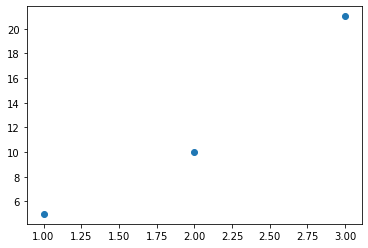

In [14]:
from matplotlib import pyplot as plt
plt.scatter(X[:, 0], Z);